In [3]:
# importando as bibliotecas necessárias para a analise (pt-br)
# importing necessary libs to the analysis (en)

import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [4]:
# importando os dados para um dataframe pandas e fazendo a primeira analise visual (pt-br)
# importing data to pandas dataframe and making the first view analysis (en)
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
df = pd.read_csv(uri)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


Nesses dados é possivel encontrar algumas caracteristicas sobre vendas de carros como ( milhas por ano, ano do modelo e preço) e uma flag (vendido) dizendo com base nessas caracteristicas se a venda foi bem sucedida ou não. (pt-br)

In these datas it's possible to find some caracteristics about automobile solds (mileage per year,model year and price) and a flag(sold) that say in base of those caractetistics if have a success in the sold or no. (en)

In [5]:
# fazendo tratamentos na no ano do modelo para descobrir a idade do modelo e melhor visualização na performance na previsao (pt-br)
# making treatments about model year to get model age and have a better view on perfoming in the prevision (en)
actual_year = datetime.today().year
df['model_age'] = actual_year - df.model_year
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
0,0,21801,2000,30941.02,yes,23
1,1,7843,1998,40557.96,yes,25
2,2,7109,2006,89627.50,no,17
3,3,26823,2015,95276.14,no,8
4,4,7935,2014,117384.68,yes,9


In [6]:
# excluindo colunas irrelevantes (pt-br)
# droping irrelevant columns (en)
df = df.drop(columns = ["Unnamed: 0","model_year"], axis=1)
df.head()

,mileage_per_year,price,sold,model_age
0,21801,30941.02,yes,23
1,7843,40557.96,yes,25
2,7109,89627.50,no,17
3,26823,95276.14,no,8
4,7935,117384.68,yes,9


In [7]:
SEED = 5
np.random.seed(SEED)

x = df[["price", "model_age","mileage_per_year"]]
y = df["sold"]


raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("We will train with %d elements and test with %d elements" % (len(raw_train_x), len(raw_test_x)))

model = DecisionTreeClassifier(max_depth=3)
model.fit(raw_train_x, train_y)
predict = model.predict(raw_test_x)

acuracia = accuracy_score(test_y, predict) * 100
print("The accuracy is %.2f%%" % acuracia)


We will train with 7500 elements and test with 2500 elements
The accuracy is 79.28%


Na célula acima estamos fixando a aleatoriade do numpy na SEED, determinando as caracteristicas no X e as categorias no Y, separando as amostras, treinando modelo e informando a acurácia. Nos treinamos com 7500 elementos e testamos com 2500, assim possuimos uma acurácia de 79,28%. (pt-br)

On the above celule we're fixing the aleatority of numpy in the SEED, determining the caracteritics on X and the categorys on Y, separating the samples, treining the models and informing the accuracy. We trained with 7500 elements and tested wit 2500, with that we get a acurracy of 79,28%. (en)

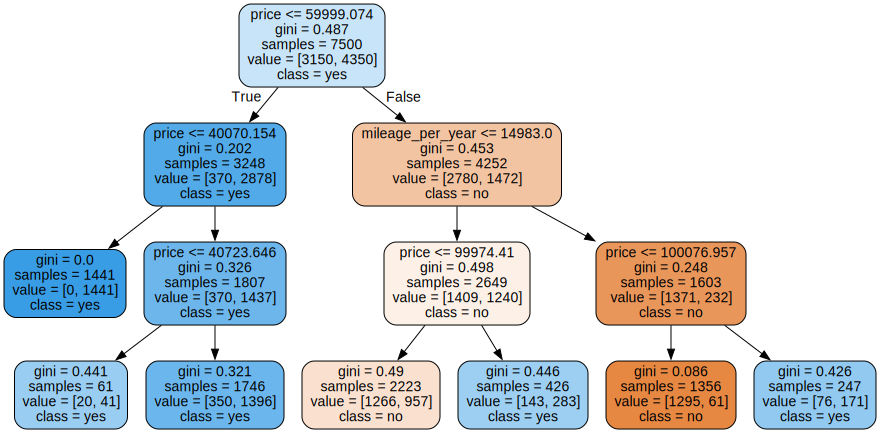

In [8]:
# plotando o gráfico (pt-br)
# plotting the chart (en)

features = x.columns
dot_data = export_graphviz(model, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["no", "yes"])
graph = graphviz.Source(dot_data)
graph

Aqui é possivel notar que carros que possuem o valor menor que 60000, tem a uma boa chance de venda, e os aqueles que possuem o valor menor que 40000 possuem uma chance melhor ainda. Por outro lado os carros que possuem o valor maior que 100000 e alta quantidade de milhas por ano tem uma alta chance de não serem vendidos, por fim os carros que possuem o valor menor que 100000 e uma quantidade de milhas por ano menor que 15000, possuem uma possibilidade de serem vendidos. (pt-br)

Here it's possible to see that the cars that has the price less than 60000, has a good possibility to be sold, and those that have the price lower 40000 have a high possibity to be sold. The cars that has the price greater then 100000 and have a high mileage per year ,has high possibily to not be sold, and these that has a price less then 100000 and the mileage per year less then 15000 have a possibily to be sold. (en)